In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#loading Data
path = 'datasets/new_movies_dataset.csv'
df_movies= pd.read_csv(path,parse_dates=['release_date'])

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45363 entries, 0 to 45362
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45363 non-null  int64         
 1   title                  45363 non-null  object        
 2   budget                 45363 non-null  float64       
 3   original_language      45352 non-null  object        
 4   overview               44422 non-null  object        
 5   popularity             45363 non-null  float64       
 6   release_date           45363 non-null  datetime64[ns]
 7   revenue                45363 non-null  float64       
 8   runtime                45117 non-null  float64       
 9   status                 45283 non-null  object        
 10  tagline                20394 non-null  object        
 11  vote_average           45363 non-null  float64       
 12  vote_count             45363 non-null  float64       
 13  b

In [4]:
#I'll fill all null value with no data
df_movies.fillna('no data', inplace=True)
df_movies.head()

,id,title,budget,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,vote_average,vote_count,belongs_to_collection,production_companies,genres,spoken_languages,production_countries,release_year,return
0,862,toy story,30000000.0,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,released,no data,7.7,5415.0,toy story collection,pixar animation studios,"animation, comedy, family",english,united states of america,1995,12.451801
1,8844,jumanji,65000000.0,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,released,roll the dice and unleash the excitement!,6.9,2413.0,no data,"tristar pictures, teitler film, interscope com...","adventure, fantasy, family","english, français",united states of america,1995,4.043035
2,15602,grumpier old men,0.0,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,released,still yelling. still fighting. still ready for...,6.5,92.0,grumpy old men collection,"warner bros., lancaster gate","romance, comedy",english,united states of america,1995,0.000000
3,31357,waiting to exhale,16000000.0,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,released,friends are the people who let you be yourself...,6.1,34.0,no data,twentieth century fox film corporation,"comedy, drama, romance",english,united states of america,1995,5.090760
4,11862,father of the bride part ii,0.0,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,released,just when his world is back to normal... he's ...,5.7,173.0,father of the bride collection,"sandollar productions, touchstone pictures",comedy,english,united states of america,1995,0.000000


In [5]:
# I'll turn runtime column type into float
# First I'll replace all no data values to NaN and then , I 'll turn value into float and fill nan values with zeros
df_movies['runtime'] = df_movies['runtime'].replace('no data', np.nan)
df_movies['runtime'] = df_movies['runtime'].astype(float).fillna(0)

In [6]:
# There's no null now
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45363 entries, 0 to 45362
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45363 non-null  int64         
 1   title                  45363 non-null  object        
 2   budget                 45363 non-null  float64       
 3   original_language      45363 non-null  object        
 4   overview               45363 non-null  object        
 5   popularity             45363 non-null  float64       
 6   release_date           45363 non-null  datetime64[ns]
 7   revenue                45363 non-null  float64       
 8   runtime                45363 non-null  float64       
 9   status                 45363 non-null  object        
 10  tagline                45363 non-null  object        
 11  vote_average           45363 non-null  float64       
 12  vote_count             45363 non-null  float64       
 13  b

In [7]:
# Verifying  duplicades
print(df_movies.duplicated().sum())

4


In [8]:
#saving data into a new csv file
df_movies.to_csv('datasets/new_movies_dataset.csv',index=False,date_format='%Y/%m/%d')

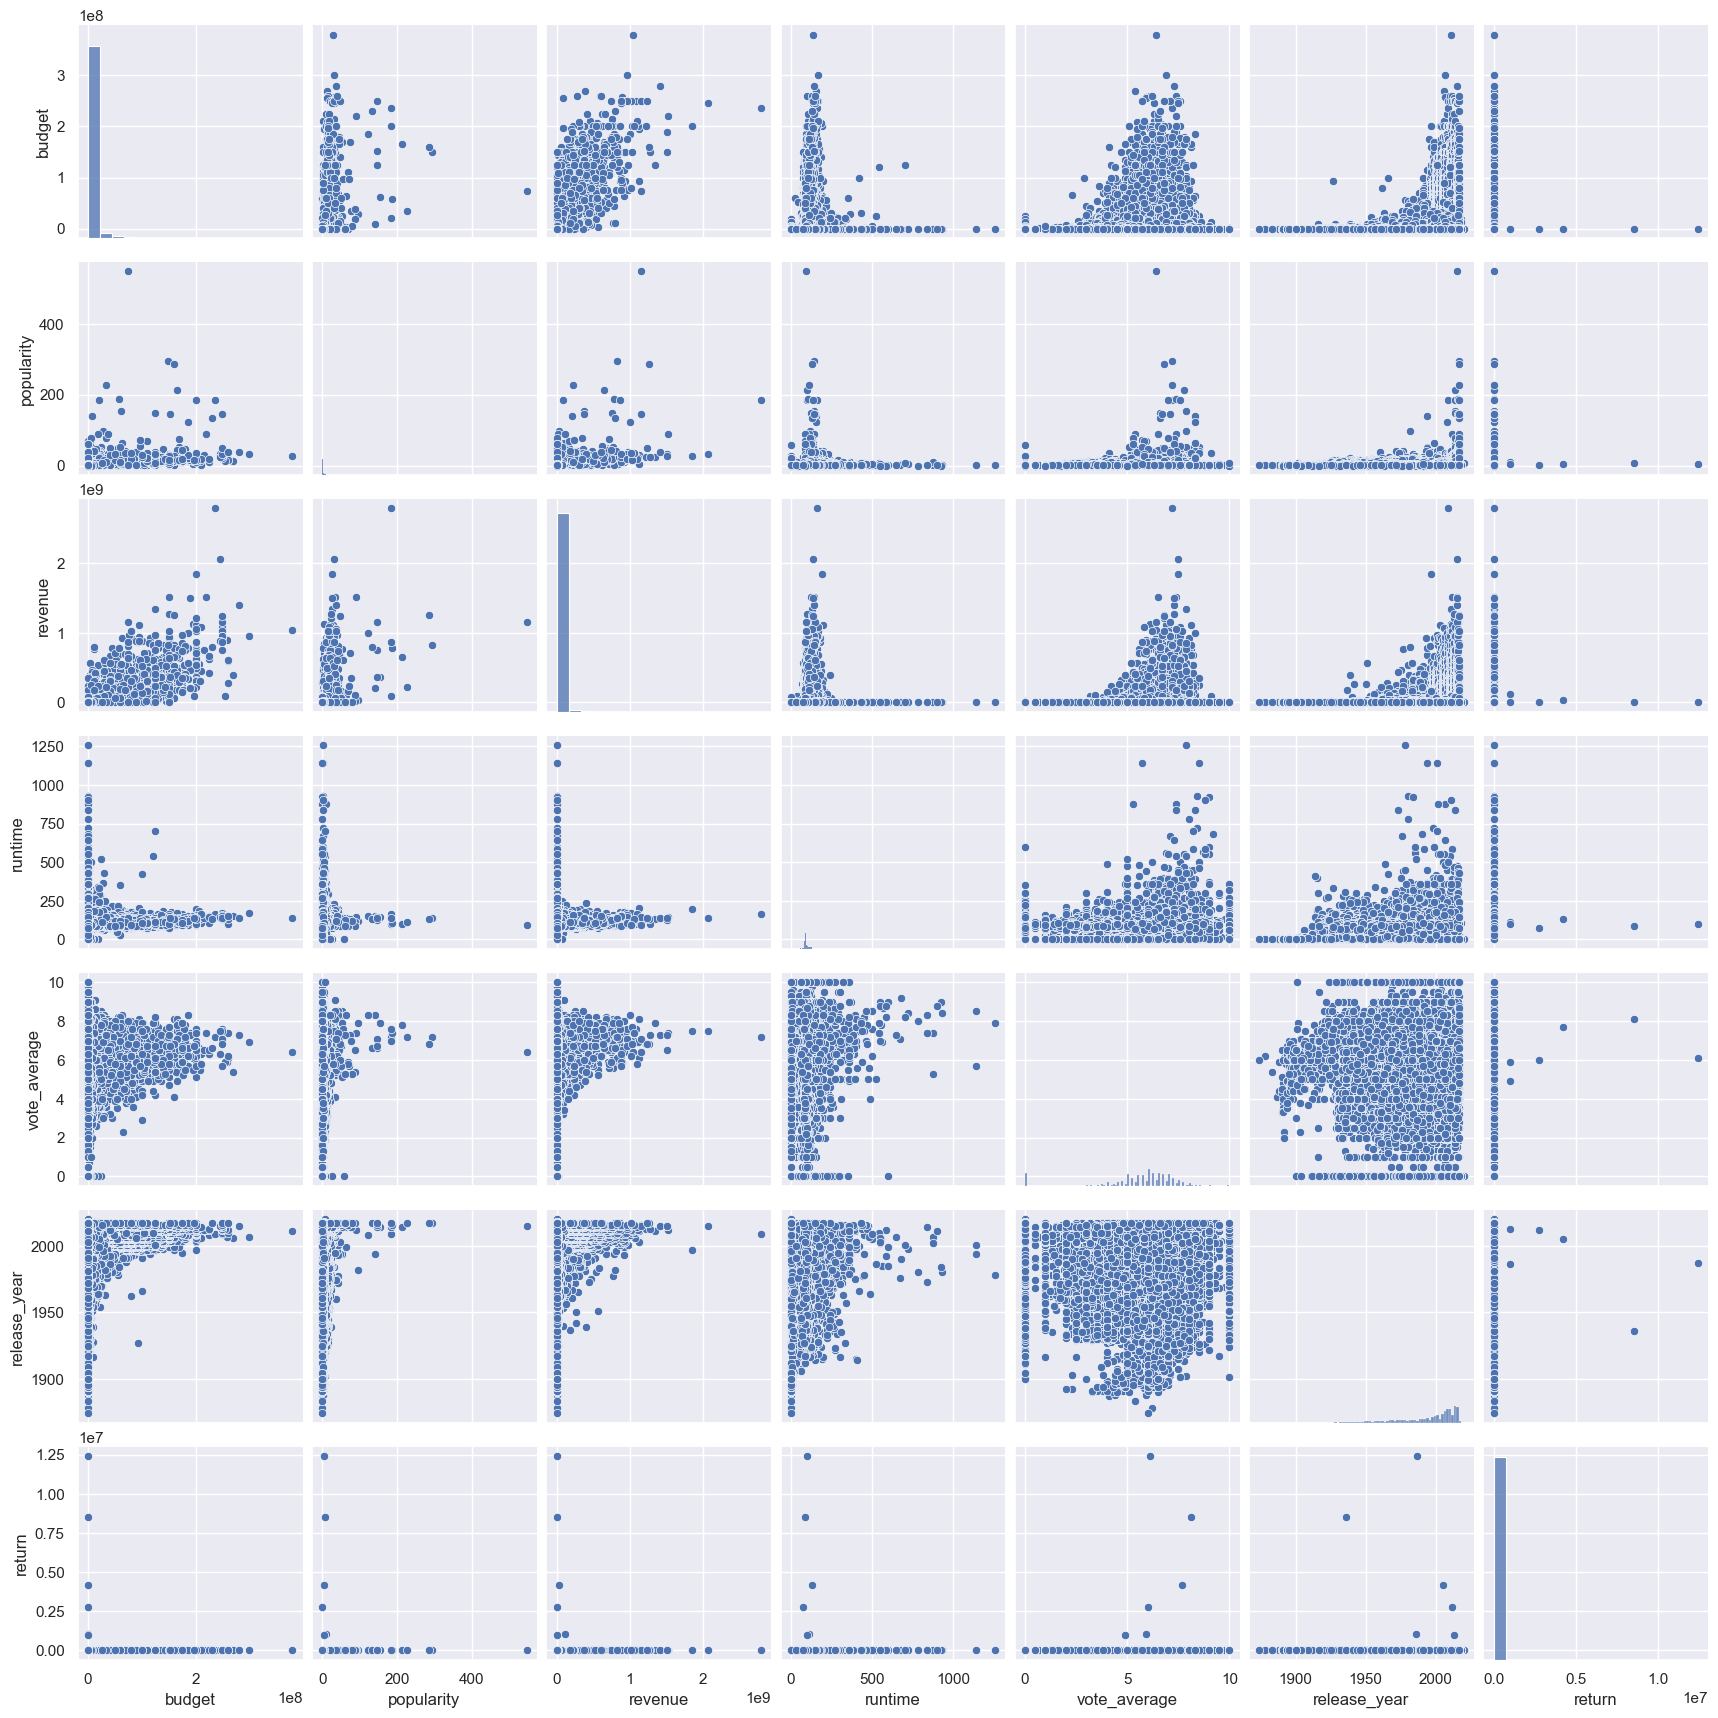

In [9]:
# In order to identify if there are some relation wuth the data let's use pairplot function
#First of all, I'll delete all cathegorical columns and also 'id' column
df_numerical_data = df_movies[['budget','popularity','revenue','runtime','vote_average','release_year','return']]
#df_numerical_data = df_movies[['budget','popularity','revenue','vote_average','release_year','return']]
sns.pairplot(data=df_numerical_data)

According to graphic above, I can infer some  significant stuff. For example. Runtime values are kind of fixed values vs budget, popularity and revenue. Now we are just going to work with budget popularity revenue return and vore average because I consider they 're the most important values 

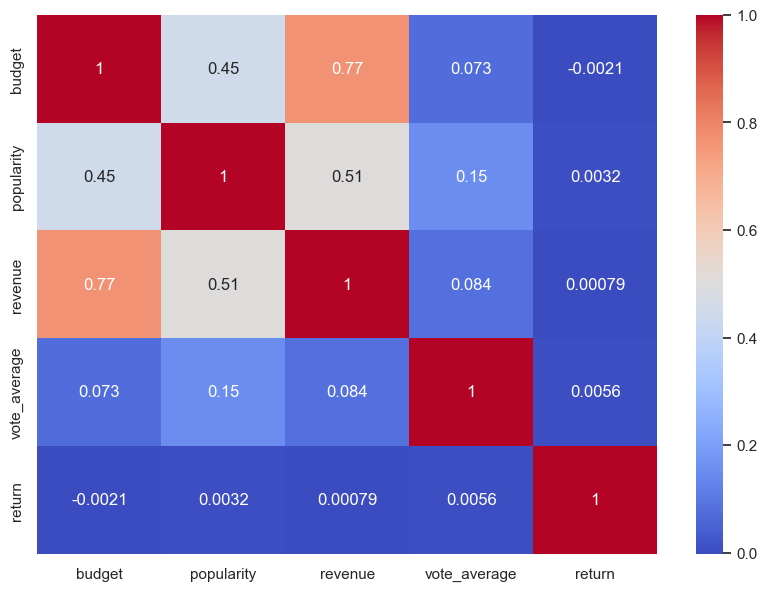

In [10]:
#Now I analyse with a heatmap on seaborn
main_values = df_numerical_data[['budget','popularity','revenue','vote_average','return']]
corr_matrix = main_values.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

Here, budget and reveneue has some relation. so, I can use any of them. Also, the oter ones, are not strongly related, so we can use those variable in order to predict some popularity abd inver the return invest. For that reason those variables are very importatn for further and deepest study.

In [11]:
# let's check the films who has the highest revenue
df_movies.revenue.describe()

count    4.536300e+04
mean     1.123331e+07
std      6.439890e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [12]:
revenue_max = df_movies.revenue.max()
budget_max = df_movies.budget[df_movies.revenue == df_movies.revenue.max()].values[0]
print('revenue - investment:', revenue_max-budget_max)
print('return:', df_movies['return'][df_movies.revenue == df_movies.revenue.max()].values[0])

revenue - investment: 2550965087.0
return: 11.763565767932487


(0.0, 1000000000.0)

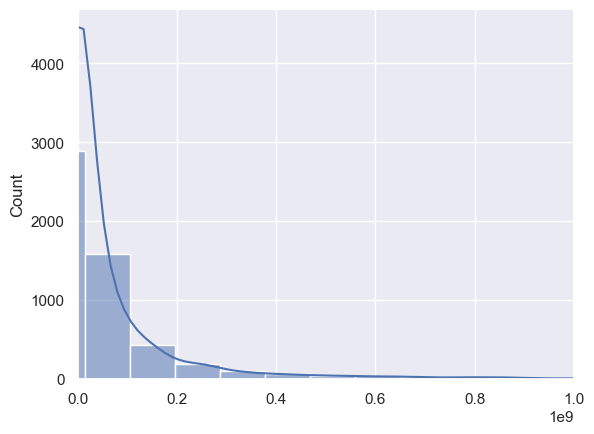

In [13]:
#return column histogram
filtered_col1 = df_movies["revenue"][df_movies["revenue"] != 0]
filtered_col2 = df_movies["budget"][df_movies["budget"] != 0]
# creating histplot on seaborn
sns.histplot(filtered_col1 - filtered_col2, kde=True, bins=30)
plt.xlim(0, 1.0e9)

<AxesSubplot:xlabel='vote_average', ylabel='Count'>

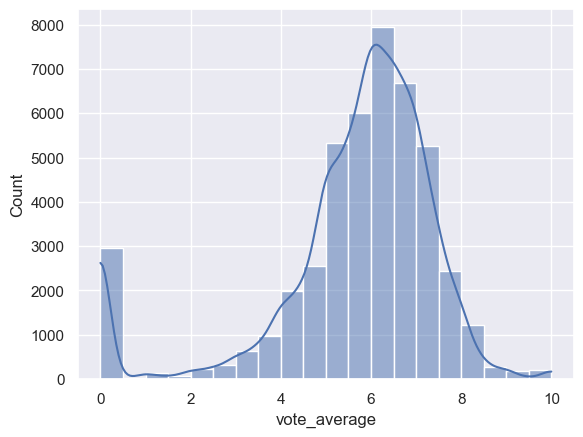

In [14]:
#vote_average histplot
sns.histplot(data=df_movies,x='vote_average', kde=True, bins=20)

(0.0, 200.0)

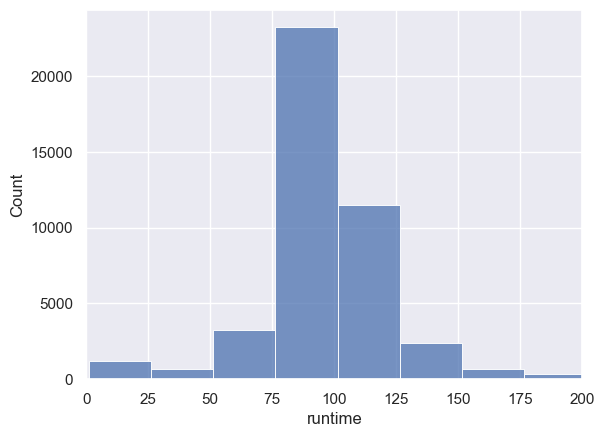

In [15]:
#runtime histplot
sns.histplot(data=df_movies[df_movies.runtime!=0],x='runtime', bins=50)
plt.xlim(0,200)
# in the graphic we can can how long movies last.

In [16]:
#Top 10 
sort_movies = df_movies.sort_values(by='vote_average', ascending=False)
sort_movies.title.head(10)

10448                                       li'l abner
38653                                      winter wind
1631                          other voices other rooms
30243                                    backyard dogs
37057                                 shuttlecock boys
22361            marvin hamlisch: what he did for love
22362                                   meat the truth
22544                                        eggshells
42645    christopher titus: angry pursuit of happiness
42647                          nick swardson: taste it
Name: title, dtype: object